<a href="https://colab.research.google.com/github/LuisRubert/predicciones-ventas/blob/main/Countries_in_the_world_by_population_(2023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/Global Population 2023 - Global Population-3.csv")
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
#Al haber solo 2 null se obto por eliminarlos.
df=df.dropna()


In [ ]:
df.describe()

In [ ]:
df.dtypes

In [ ]:
# Convertimos columnas a los tipos de datos apropiados
df['Population\n(2023)'] = pd.to_numeric(df['Population\n(2023)'], errors='coerce')
df['Yearly\nChange'] = pd.to_numeric(df['Yearly\nChange'].str.rstrip('%'), errors='coerce') / 100
df['Density\n(P/Km²)'] = pd.to_numeric(df['Density\n(P/Km²)'], errors='coerce')
df['Urban\nPop %'] = pd.to_numeric(df['Urban\nPop %'].str.rstrip('%'), errors='coerce') / 100
df['World\nShare'] = pd.to_numeric(df['World\nShare'].str.rstrip('%'), errors='coerce') / 100

In [ ]:
# Seleccionamos los 10 países más densamente poblados
top10_density = df.nlargest(10, 'Density\n(P/Km²)')

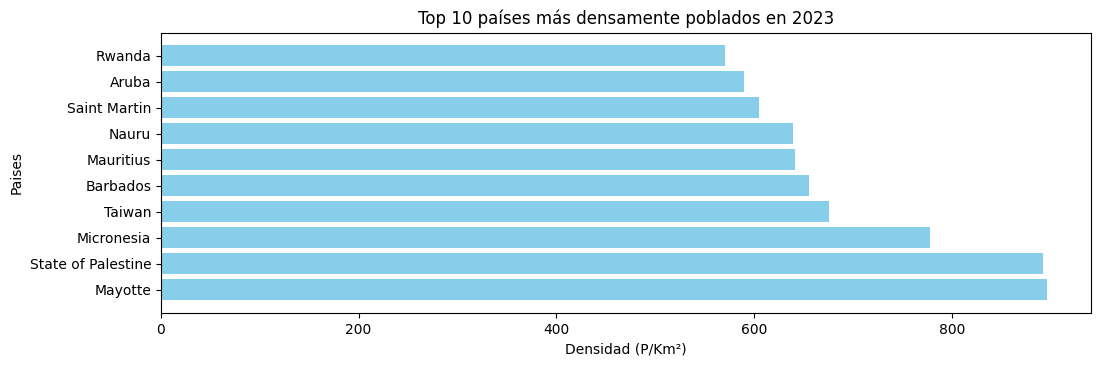

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.barh(top10_density['Country (or dependency)'], top10_density['Density\n(P/Km²)'],
         color='skyblue')
plt.xlabel('Densidad (P/Km²)')
plt.ylabel('Paises')
plt.title('Top 10 países más densamente poblados en 2023')
plt.show()

In [ ]:
df['Population\n(2023)'].isnull().sum()

233

In [ ]:
data = df.dropna(subset=['Urban\nPop %'])


In [ ]:
data_sorted = data.sort_values(by='Urban\nPop %', ascending=False)

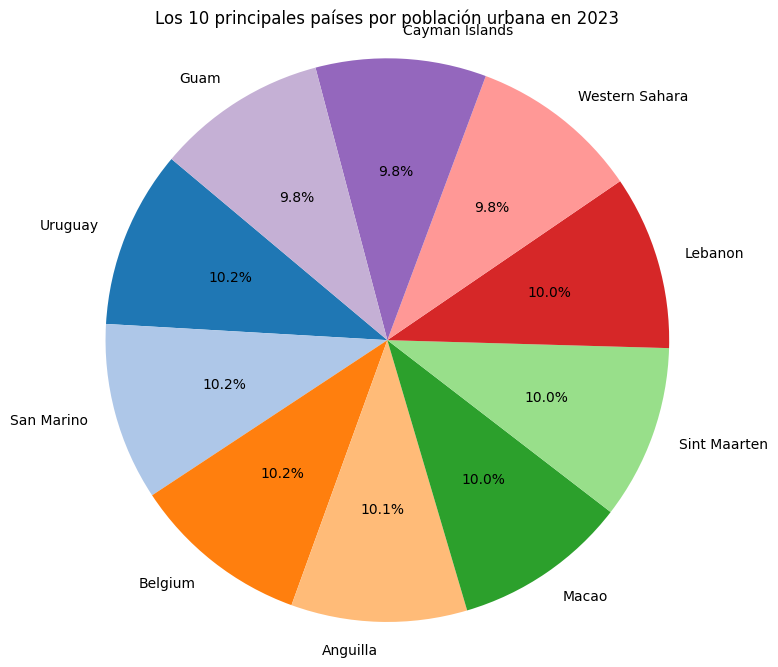

In [ ]:
# Seleccionar los 10 países con mayor población urbana
top10_urban_population = data_sorted.head(10)

plt.figure(figsize=(8, 8))
# Gráfico de pastel para la población urbana en 2023
plt.pie(top10_urban_population['Urban\nPop %'], labels=top10_urban_population['Country (or dependency)'],
        autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.axis('equal')
plt.title('Los 10 principales países por población urbana en 2023')

# Mostrar la figura
plt.show()